In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import io
from contextlib import redirect_stdout
import sys
sys.path.append("../scripts")


import data

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
def test():
    print({"oi": 1})



{'oi': 1}

In [17]:
(
        X_train,
        A_train,
        Y_train,
        X_val,
        A_val,
        Y_val,
        X_test,
        A_test,
        Y_test,
) = data.get_fold("compas", 0, 10, 4, 0)

{'False_False': 0, 'False_True': 1, 'True_True': 2, 'True_False': 3}


In [26]:
X_train["race_Native American"].mean()

0.0022530329289428075

In [18]:
X_train

Index(['juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'sex_Male', 'age_cat_25 - 45', 'age_cat_Greater than 45',
       'age_cat_Less than 25', 'race_African-American', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Native American',
       'race_Other'],
      dtype='object')

german 0.03


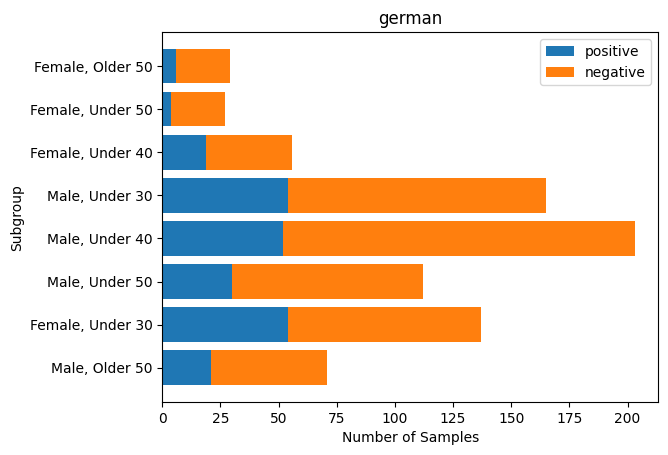

compas 0.03


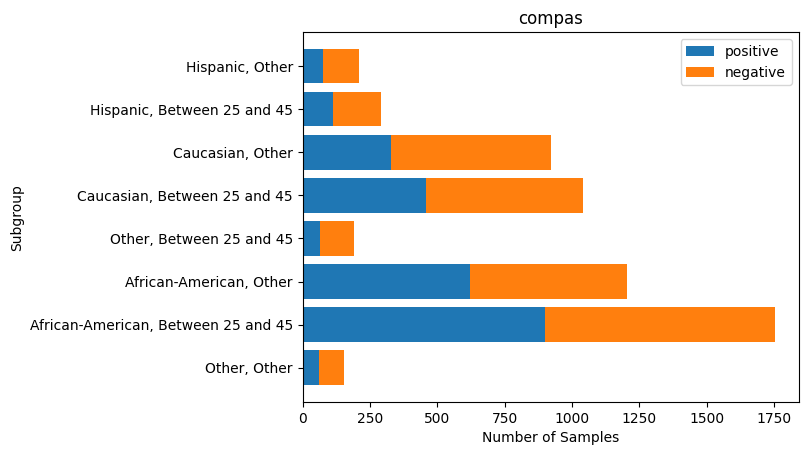

taiwan 0.04


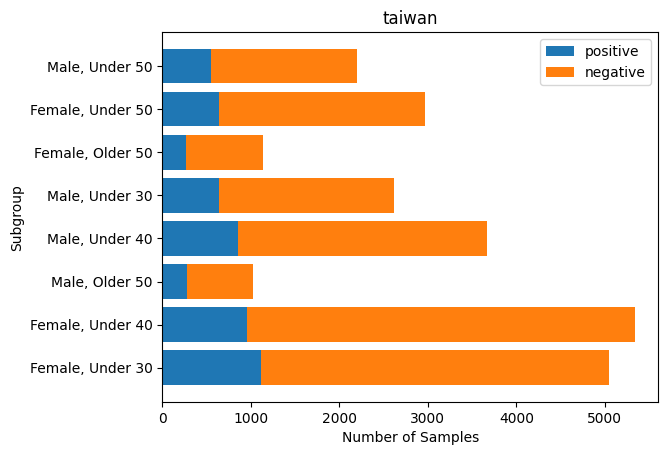

adult 0.06


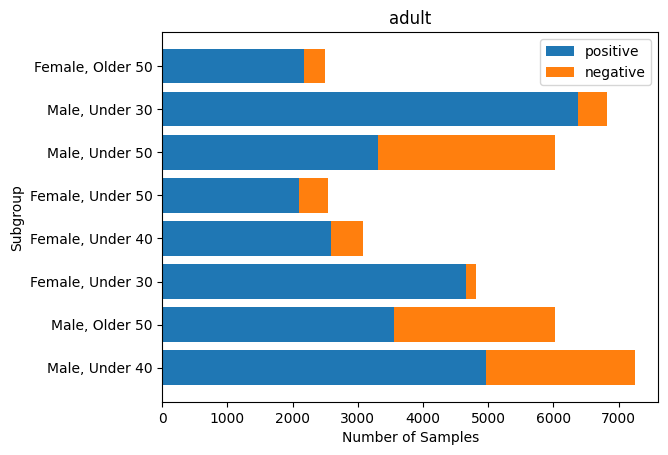

enem 0.1


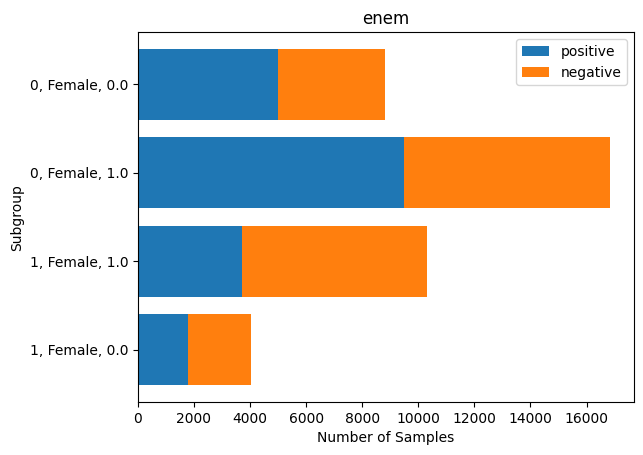

acsincome 0.03


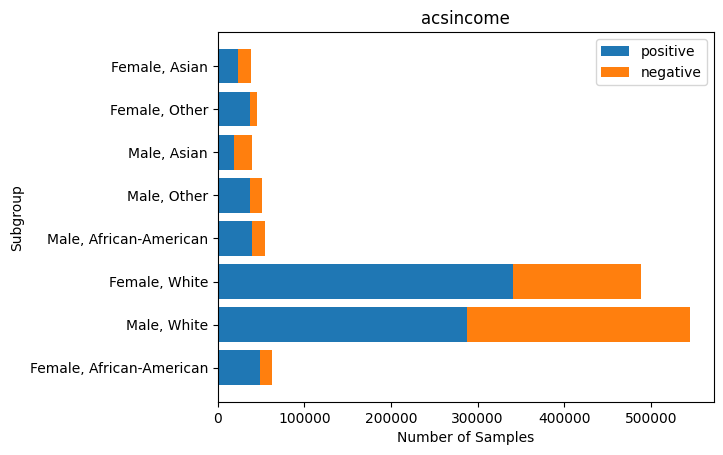

In [50]:
for dataset in ["german", "compas", "taiwan", "adult", "enem", "acsincome"]:
    f = io.StringIO() # to catch print
    with redirect_stdout(f):
        (
            X_train,
            A_train,
            Y_train,
            X_val,
            A_val,
            Y_val,
            X_test,
            A_test,
            Y_test,
        ) = data.get_fold(dataset, 0, 10, 8, 0)
    groups_dict = literal_eval(f.getvalue())
    # invert dict
    groups_dict = {v: k for k, v in groups_dict.items()}

    groups = A_train.unique()
    groups_df = []
    for group in groups:
        groups_df.append({
            "group" : group,
            "size" : len(A_train[A_train == group]),
            "positive_size" : Y_train[A_train == group].sum(),
            "positive_rate" : Y_train[A_train == group].sum() / len(A_train),
            "prop" : len(A_train[A_train == group]) / len(A_train)
        })
    groups_df = pd.DataFrame(groups_df)
    groups_df["negative_size"] = groups_df["size"] - groups_df["positive_size"]
    groups_df["negative_rate"] = groups_df["prop"] - groups_df["positive_rate"]

    print(dataset, np.round(groups_df.prop.min(), 2))
    fig, ax = plt.subplots()
    ax.barh(groups_df["group"], groups_df["negative_size"], label="positive")
    bottom = groups_df["negative_size"]
    ax.barh(groups_df["group"], groups_df["positive_size"], left=bottom, label="negative")
    ax.legend()
    ax.set_title(dataset)
    ax.set_xlabel("Number of Samples")
    ax.set_ylabel("Subgroup")
    ax.set_yticks(groups_df["group"])
    ax.set_yticklabels([groups_dict[group] for group in groups_df["group"]])
    plt.show()